<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/cnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/pvigier/perlin-numpy

  Cloning https://github.com/pvigier/perlin-numpy to /tmp/pip-req-build-g3uytv5c
  Running command git clone --filter=blob:none --quiet https://github.com/pvigier/perlin-numpy /tmp/pip-req-build-g3uytv5c
  Resolved https://github.com/pvigier/perlin-numpy to commit 5e26837db14042e51166eb6cad4c0df2c1907016
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install noise


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 kB 8.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
import numpy as np
from perlin_numpy import generate_perlin_noise_2d
import noise
from noise import pnoise2
from noise import snoise3
import tensorflow_addons as tfa
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense

2023-08-01 00:29:07.548987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


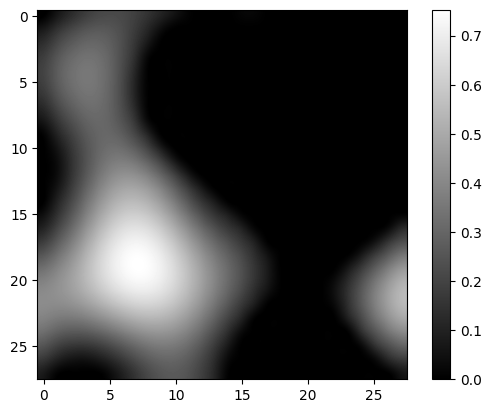

In [5]:
#np.random.seed(1)
noise = generate_perlin_noise_2d((28, 28), (2, 2))
noise = np.clip(noise,0,1)
plt.imshow(noise, cmap='gray', interpolation='lanczos')
plt.colorbar()

In [6]:


# Load MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [-1, 1]
#x_train = (x_train.astype("float32") - 127.5) / 127.5
#y_train = y_train.reshape(-1, 1)
x_train = (x_train.astype("float32")) / np.max(x_train)


# Example usage
image_index = 0  # Index of the image you want to retrieve
image = x_train[image_index]
print(image.shape)
print(x_train.shape[0])


(28, 28)
60000


In [7]:
print(np.max(x_train))

1.0


In [178]:
x_train2 = x_train[:500]
y_train2 = y_train[:500]

In [161]:
class AddNoiseLayer(tf.keras.layers.Layer):
    def __init__(self, stddev, probability, **kwargs):
        super(AddNoiseLayer, self).__init__(**kwargs)
        self.stddev = stddev
        self.probability = probability

    def call(self, inputs, training=True):
        if training:

            if tf.random.uniform(()) < self.probability:
                perlin = generate_perlin_noise_2d((28, 28), (2, 2))
                perlin = tf.convert_to_tensor(perlin, dtype=tf.float32)
                perlin = tf.clip_by_value(perlin, 0, 1)
                perlin = tf.reshape(perlin, (28, 28, 1))
                noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
                output = inputs + noise * perlin
                return tf.clip_by_value(output, 0, 1)
            else:
                return inputs
        return inputs

In [162]:
class AddNoiseLayertest(tf.keras.layers.Layer):
    def __init__(self, stddev=.5, **kwargs):
        super(AddNoiseLayertest, self).__init__(**kwargs)
        self.stddev = stddev

    def call(self, inputs, training=None):
        if training:

              perlin = generate_perlin_noise_2d((28, 28), (2, 2))
              perlin = tf.convert_to_tensor(perlin, dtype=tf.float32)
              perlin = tf.clip_by_value(perlin, 0, 1)
              perlin = tf.reshape(perlin, (28, 28, 1))
              noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
              output = inputs + noise * perlin
              return tf.clip_by_value(output, 0, 1)
        return inputs

In [163]:
def perlin_comp(shape,prob):
  if np.random.rand() < prob:
    perlin = generate_perlin_noise_2d((shape), (2, 2))
    output = np.expand_dims(perlin, axis=-1)
  else:
    output = np.zeros((28, 28, 1))
  return output


class AddNoiseLayer(tf.keras.layers.Layer):
    def __init__(self,stddev, probability, **kwargs):
        super(AddNoiseLayer, self).__init__(**kwargs)
        self.stddev = stddev
        self.probability = probability

    def call(self, inputs, training=True):
        if training:
            stacked_perlin = np.stack([perlin_comp((28,28),self.probability) for _ in range(inputs.shape[0])], axis=0)
            perlin = tf.convert_to_tensor(stacked_perlin, dtype=tf.float32)
            perlin = tf.clip_by_value(perlin, 0, 1)
            noise = tf.random.normal(shape=tf.shape(inputs), mean=0.0, stddev=self.stddev, dtype=tf.float32)
            output = noise * perlin
            return tf.clip_by_value(inputs+output, 0, 1)
        else:
            return inputs

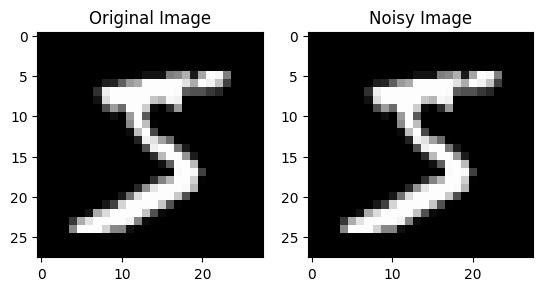

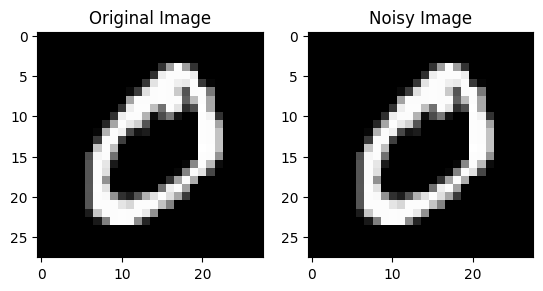

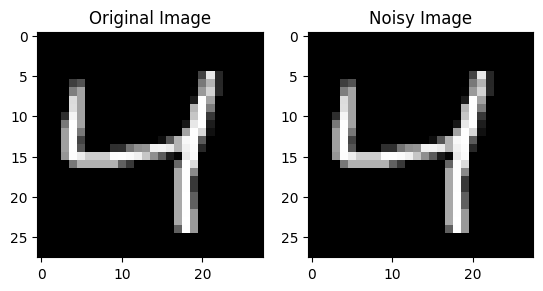

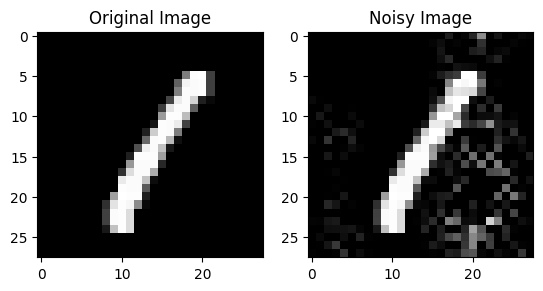

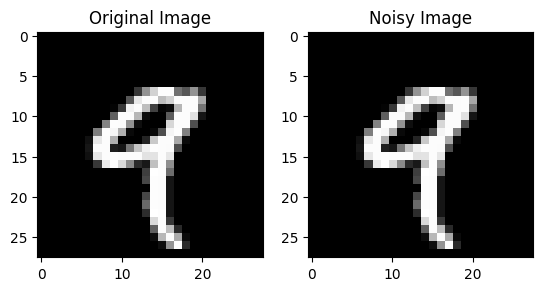

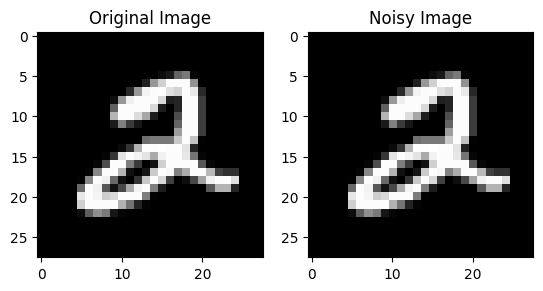

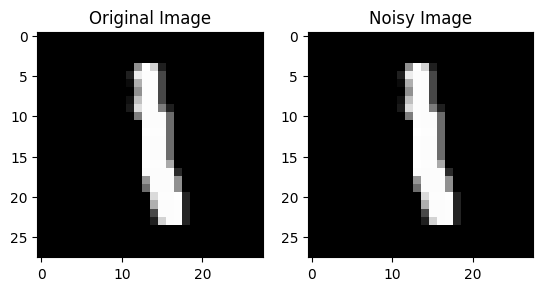

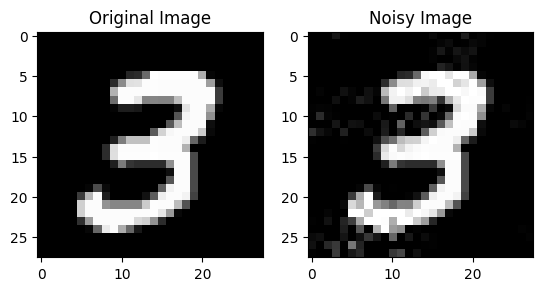

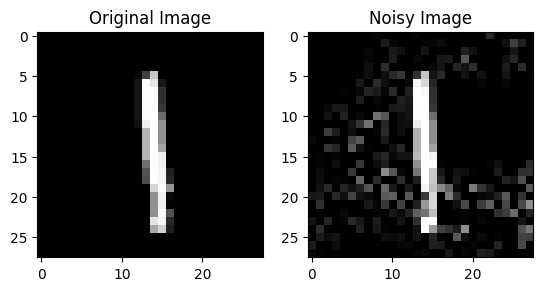

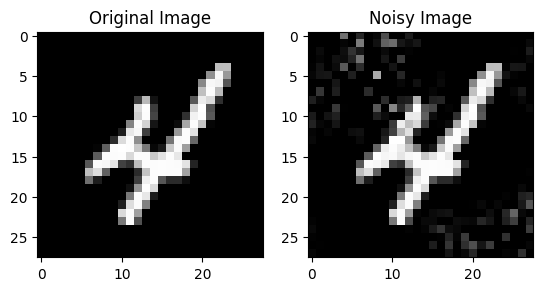

(10, 28, 28, 1)


In [164]:
# Create a random 28x28 image tensor
image = x_train[0:10]
image = np.expand_dims(image,-1)
# Instantiate the RandomNoiseLayer
GaussianPerlinNoiseLayer = AddNoiseLayer(.5,.5)

# Pass the image through the layer
noisy_image = GaussianPerlinNoiseLayer(image,training=True)

# Display the original and noisy images
import matplotlib.pyplot as plt
for i in range(10):
  plt.subplot(1, 2, 1)
  plt.imshow(np.squeeze(image[i]), cmap='gray')  # Display the original image
  plt.title('Original Image')
  plt.subplot(1, 2, 2)
  plt.imshow(np.squeeze(noisy_image[i]), cmap='gray')  # Display the noisy image
  plt.title('Noisy Image')
  plt.show()

print(noisy_image.shape)

In [165]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.filters = filters
        self.strides = strides
        self.activation = tf.keras.activations.get(activation)

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), strides=1, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        self.shortcut = tf.keras.layers.Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')
        self.shortcut_bn = tf.keras.layers.BatchNormalization()

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.activation(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)

        shortcut = self.shortcut(inputs)
        shortcut = self.shortcut_bn(shortcut, training=training)

        x = tf.keras.layers.add([x, shortcut])
        x = self.activation(x)

        return x

In [166]:
class CustomFullAug(tf.keras.layers.Layer):
    def __init__(self, probability=.2,rot_factor=.2,height=.2,width=.2,stdev=.2):
        super(CustomFullAug, self).__init__()
        self.probability = probability

        self.rot_factor = rot_factor
        self.height = height
        self.width = width
        self.stdev = stdev
        self.flip_layer = tf.keras.layers.RandomFlip()
        self.zoom_layer = tf.keras.layers.RandomZoom(height_factor=height,width_factor=width)
        self.rotation_layer = tf.keras.layers.RandomRotation(factor=rot_factor)
        self.noise_layer = AddNoiseLayertest()

    def call(self, inputs=.2, training=True):
        if tf.random.uniform(()) < self.probability:
            #flipped_data = self.flip_layer(inputs, training=training)
            rotated_data = self.rotation_layer(inputs, training=training)
            zoomed_data = self.zoom_layer(rotated_data, training=training)
            noised = self.noise_layer(zoomed_data, training=training)
            return noised
        else:
            return inputs

In [167]:

class CustomFlipLayer(tf.keras.layers.Layer):
    def __init__(self, probability):
        super(CustomFlipLayer, self).__init__()
        self.probability = probability
        self.flip_layer = tf.keras.layers.RandomFlip()

    def call(self, inputs=.2, training=True):
        if tf.random.uniform(()) < self.probability:
            flipped_data = self.flip_layer(inputs, training=training)
            return flipped_data
        else:
            return inputs

In [168]:
class CustomRotationLayer(tf.keras.layers.Layer):
    def __init__(self, probability, factor):
        super(CustomRotationLayer, self).__init__()
        self.probability = probability
        self.factor = factor
        self.rotation_layer = tf.keras.layers.RandomRotation(factor=factor)

    def call(self, inputs, training=True):
        if tf.random.uniform(()) < self.probability:
            rotated_data = self.rotation_layer(inputs, training=training)
            return rotated_data
        else:
            return inputs

In [169]:
class CustomZoomLayer(tf.keras.layers.Layer):
    def __init__(self, probability,height, width):
        super(CustomZoomLayer, self).__init__()
        self.probability = probability
        self.height = height
        self.width = width
        self.zoom_layer = tf.keras.layers.RandomZoom(height_factor=height,width_factor=width)

    def call(self, inputs, training=False):
        if tf.random.uniform(()) < self.probability:
            zoomed_data = self.zoom_layer(inputs, training=training)
            return zoomed_data
        else:
            return inputs

In [170]:
def build_generator():
    noise_shape = (100,)
    noise = layers.Input(shape=noise_shape)
    #noise_reshaped = layers.Flatten()(noise)
    input_digit = layers.Input(shape=(1,), dtype="int32")
    digit_embedding = layers.Embedding(10, 10)(input_digit)
    #digit_embedding = layers.Reshape((28, 28, 1))(digit_embedding)
    digit_embedding = layers.Flatten()(digit_embedding)
    

    x = layers.Concatenate()([noise, digit_embedding])
    
    x = layers.Dense(500)(x)
    x = layers.BatchNormalization()(x)
    

    
    x = layers.Dense(28 * 28,activation='sigmoid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Reshape((28,28,1))(x)

    '''
    x = layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)


    x = layers.Conv2D(1, kernel_size=2, strides=1, padding='same', activation='sigmoid')(x)
    '''
    
    model = tf.keras.models.Model(inputs=[noise, input_digit], outputs=x)
    return model

generator = build_generator()
generator.summary()

Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_107 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 embedding_36 (Embedding)       (None, 1, 10)        100         ['input_107[0][0]']              
                                                                                                  
 input_106 (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 flatten_34 (Flatten)           (None, 10)           0           ['embedding_36[0][0]']           
                                                                                           

In [171]:
from tensorflow.keras import regularizers
class ResnetBlock(layers.Layer):
    def __init__(self, filters, strides=1, l2_reg=0.01):
        super(ResnetBlock, self).__init__()
        self.filters = filters
        self.strides = strides

        self.conv1 = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', 
                                   kernel_regularizer=regularizers.l2(l2_reg))
        self.bn1 = layers.BatchNormalization()

        self.conv2 = layers.Conv2D(filters, (3, 3), strides=1, padding='same', 
                                   kernel_regularizer=regularizers.l2(l2_reg))
        self.bn2 = layers.BatchNormalization()

        if strides != 1:
            self.residual = layers.Conv2D(filters, (1, 1), strides=strides, 
                                          kernel_regularizer=regularizers.l2(l2_reg))
        else:
            self.residual = lambda x: x

    def call(self, inputs, training=False):
        res = self.residual(inputs)

        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = tf.nn.relu(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)

        x += res
        return tf.nn.relu(x)

In [172]:

def build_discriminator():
    input_image = layers.Input(shape=(28, 28, 1))
    digit_input = layers.Input(shape=(1,), dtype="int32")
    digit_embedding_2d = layers.Embedding(10, 28*28)(digit_input)
    digit_embedding_2d = layers.Reshape((28, 28, 1))(digit_embedding_2d)

    #noise = AddNoiseLayer(stddev=0.2,probability=.1)(input_image)  # Pass the input image through the PerlinNoiseLayer
    #aug = CustomFullAug(probability=.01)(input_image)
    merged_input = layers.Concatenate()([input_image, digit_embedding_2d])

    x = ResnetBlock(64,2)(merged_input)
    x = layers.Dropout(.5)(x)
    x = ResnetBlock(64,2)(x)
    x = layers.Dropout(.5)(x)
    x = ResnetBlock(64,2)(x)
    x = layers.Dropout(.5)(x)
    x = ResnetBlock(64,2)(x)
    x = layers.Dropout(.5)(x)


    x = layers.Flatten()(x)
    x = layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.models.Model(inputs=[input_image, digit_input], outputs=x)
    return model

discriminator = build_discriminator()
discriminator.summary()

Model: "model_49"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_109 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 embedding_37 (Embedding)       (None, 1, 784)       7840        ['input_109[0][0]']              
                                                                                                  
 input_108 (InputLayer)         [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 reshape_40 (Reshape)           (None, 28, 28, 1)    0           ['embedding_37[0][0]']           
                                                                                           

In [173]:
# Define the GAN model
def build_gan(generator, discriminator):
    noise_shape = (100,)
    digit_shape = (1,)
    noise = layers.Input(shape=noise_shape)
    digit = layers.Input(shape=digit_shape)

    generated_image = generator([noise, digit])

    discriminator_output = discriminator([generated_image, digit])
    model = tf.keras.models.Model(inputs=[noise, digit], outputs=discriminator_output)
    return model

gan = build_gan(generator, discriminator)
gan.summary()




Model: "model_50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_110 (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 input_111 (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 model_48 (Functional)          (None, 28, 28, 1)    453520      ['input_110[0][0]',              
                                                                  'input_111[0][0]']              
                                                                                                  
 model_49 (Functional)          (None, 1)            282529      ['model_48[0][0]',        

In [180]:
# Compile models
generator_optimizer = tf.keras.optimizers.Adam(.004)
discriminator_optimizer = tf.keras.optimizers.Adam(.0001)

#generator_optimizer = tf.keras.optimizers.experimental.SGD(1e-4)
#discriminator_optimizer = tf.keras.optimizers.experimental.SGD(1e-4)

In [181]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy()(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy()(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy()(tf.ones_like(fake_output), fake_output)



In [176]:
def compute_ssim(images):
    combined_ssim = 0.0
    num_pairs = 0

    for i in range(len(images)):
        for j in range(i+1, len(images)):
            ssim = tf.image.ssim(images[i], images[j], max_val=1.0)
            combined_ssim += ssim
            num_pairs += 1

    if num_pairs > 0:
        combined_ssim /= num_pairs

    return combined_ssim

In [ ]:
#@tf.function
def train_step(images, labels,num_unrolling_steps):
    batch_size = images.shape[0]
    noise = tf.random.normal([batch_size, 100])


    generated_images = generator([noise, labels], training=True)
    real_output = discriminator([images, labels], training=True)
    fake_output = discriminator([generated_images, labels], training=True)
    disc_loss = discriminator_loss(real_output, fake_output)
    gen_loss = generator_loss(fake_output)


    for _ in range(num_unrolling_steps if disc_loss>.5 else 1):
        test = tf.expand_dims(images, axis=-1)
        loss = disc_loss.numpy()
        modiy = (.5-np.clip(loss,0,.5))*2
        GaussianPerlinNoiseLayer = AddNoiseLayer(.5, modiy)
        test = GaussianPerlinNoiseLayer(test,training=True)

        with tf.GradientTape() as disc_tape:

            generated_images = generator([noise, labels], training=True)

            real_output = discriminator([test, labels], training=True)
            fake_output = discriminator([generated_images, labels], training=True)

            disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    with tf.GradientTape() as gen_tape:
        generated_images = generator([noise, labels], training=True)
        fake_output = discriminator([generated_images, labels], training=True)
        ssim = compute_ssim(generated_images[:5])
        gen_loss += ssim
        gen_loss = generator_loss(fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))



    tf.print("disc_loss",disc_loss,'gen_loss',gen_loss,'ssim',ssim)
def train(generator, discriminator, gan, epochs, batch_size,num_unrolling_steps):
    for epoch in range(epochs):
        for batch in range(len(x_train2) // batch_size):
            images = x_train2[batch * batch_size: (batch+1) * batch_size]
            labels = y_train2[batch * batch_size: (batch+1) * batch_size]

            train_step(images, labels,num_unrolling_steps)

        # Output training progress
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{epochs}")
            # Generate and save sample images
            noise = tf.random.normal([10, 100])
            sampled_labels = tf.constant([[i % 10] for i in range(10)], dtype=tf.int32)
            generated_images = generator.predict([noise, sampled_labels])
            generated_images = generated_images#(generated_images * 0.5) + 0.5  # Rescale images from [-1, 1] to [0, 1]
            fig, axs = plt.subplots(1, 10, figsize=(10, 10))
            for i in range(10):
                axs[i].imshow(generated_images[i], cmap="gray")
                axs[i].axis("off")
            plt.show()

# Train the GAN
EPOCHS = 20000
BATCH_SIZE = 100
num_unrolling_steps = 5  # Set the desired number of unrolling steps
train(generator, discriminator, gan, EPOCHS, BATCH_SIZE,num_unrolling_steps=num_unrolling_steps)